In [1]:
from EarthquakeSignal import EarthquakeBatchProcessor


In [2]:
# pip list

### Set config manual 

In [3]:
config = {
    'file_extension': '.txt',
    'unit_factor': 981,
    
    'apply_baseline_correction': True,
    'apply_arias_analysis': True,
    'apply_fourier_analysis': True,
    '_compute_newmark_spectra': True,
    'compute_rotd': False,
    'print_summary': True,
    
    'plot_signals': True,
    'plot_corrected_signals': False,
    'plot_arias_signals': False,
    'plot_fourier_signals': False,  
    'plot_newmark_spectra': True,
    'plot_rotd': False,
    
    'writer': True, 
}


In [4]:
registers_path = r'data\IG'



📌 Earthquake ID: APED
Sampling interval (dt): 0.010000 s
Number of samples: 17502
Total duration: 175.02 s
Component information:
  - H1: file='APED_201604162359_N_100.txt', RMS=8.4004e-02
  - H2: file='APED_201604162359_E_100.txt', RMS=1.0348e-01
  - V: file='APED_201604162359_Z_100.txt', RMS=4.8905e-02



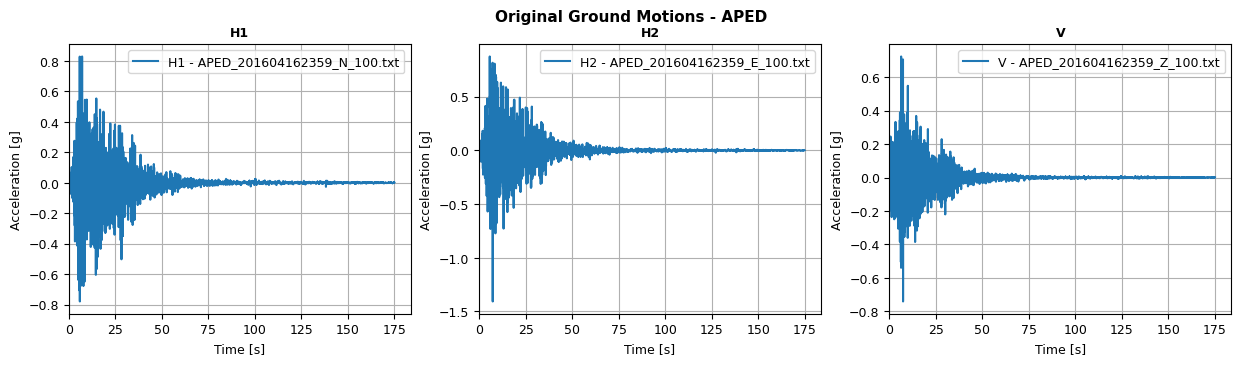

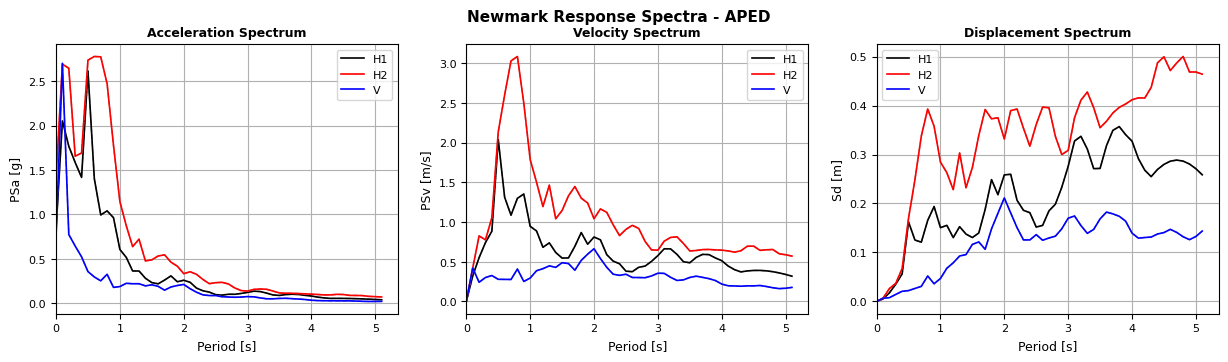

In [5]:
processor = EarthquakeBatchProcessor(registers_path, config)
earthquake = processor.process_all()


### For each earthquake


📌 Earthquake ID: APED
Sampling interval (dt): 0.010000 s
Number of samples: 17502
Total duration: 175.02 s
Component information:
  - H1: file='APED_201604162359_N_100.txt', RMS=8.4004e-02
  - H2: file='APED_201604162359_E_100.txt', RMS=1.0348e-01
  - V: file='APED_201604162359_Z_100.txt', RMS=4.8905e-02



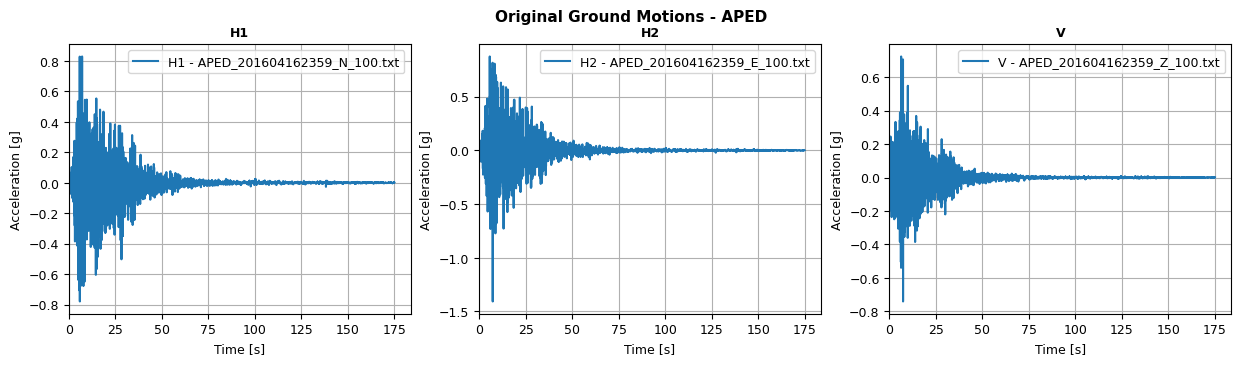

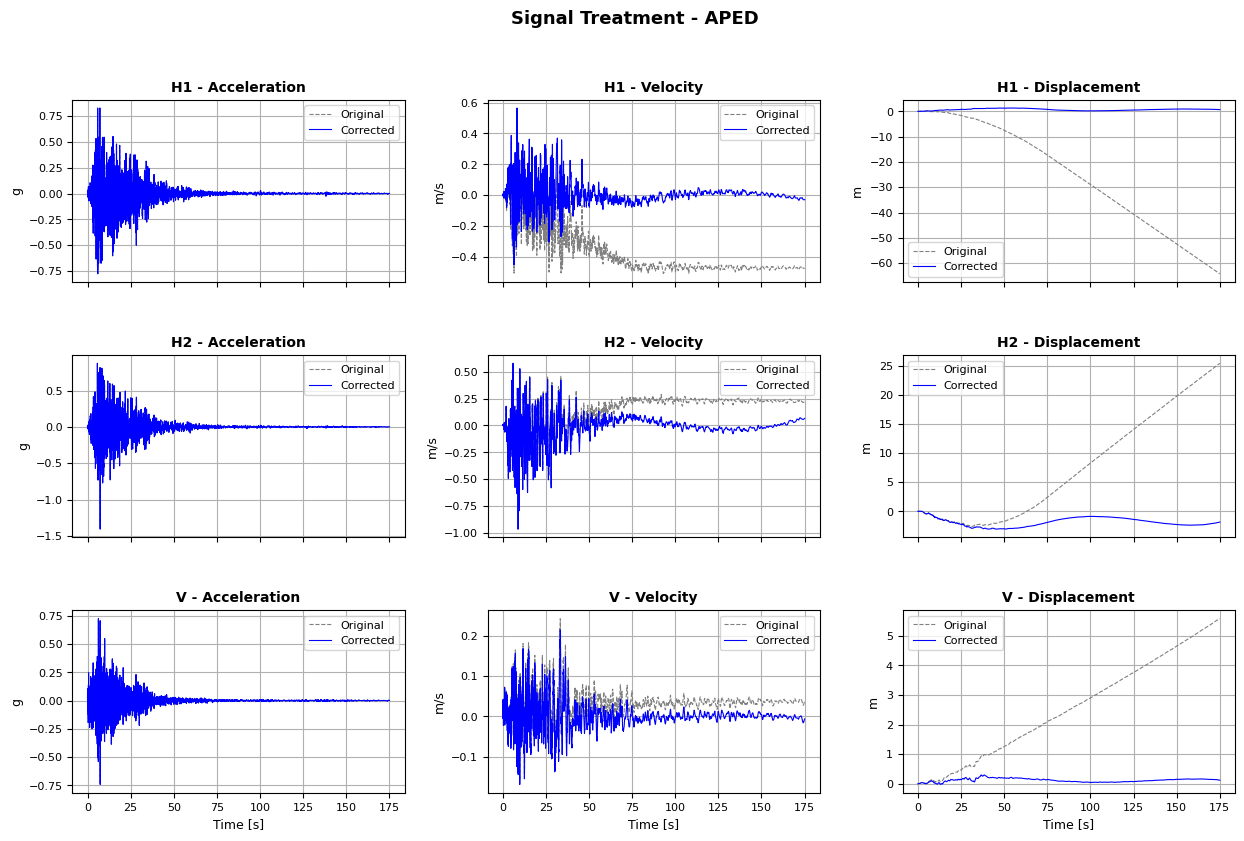

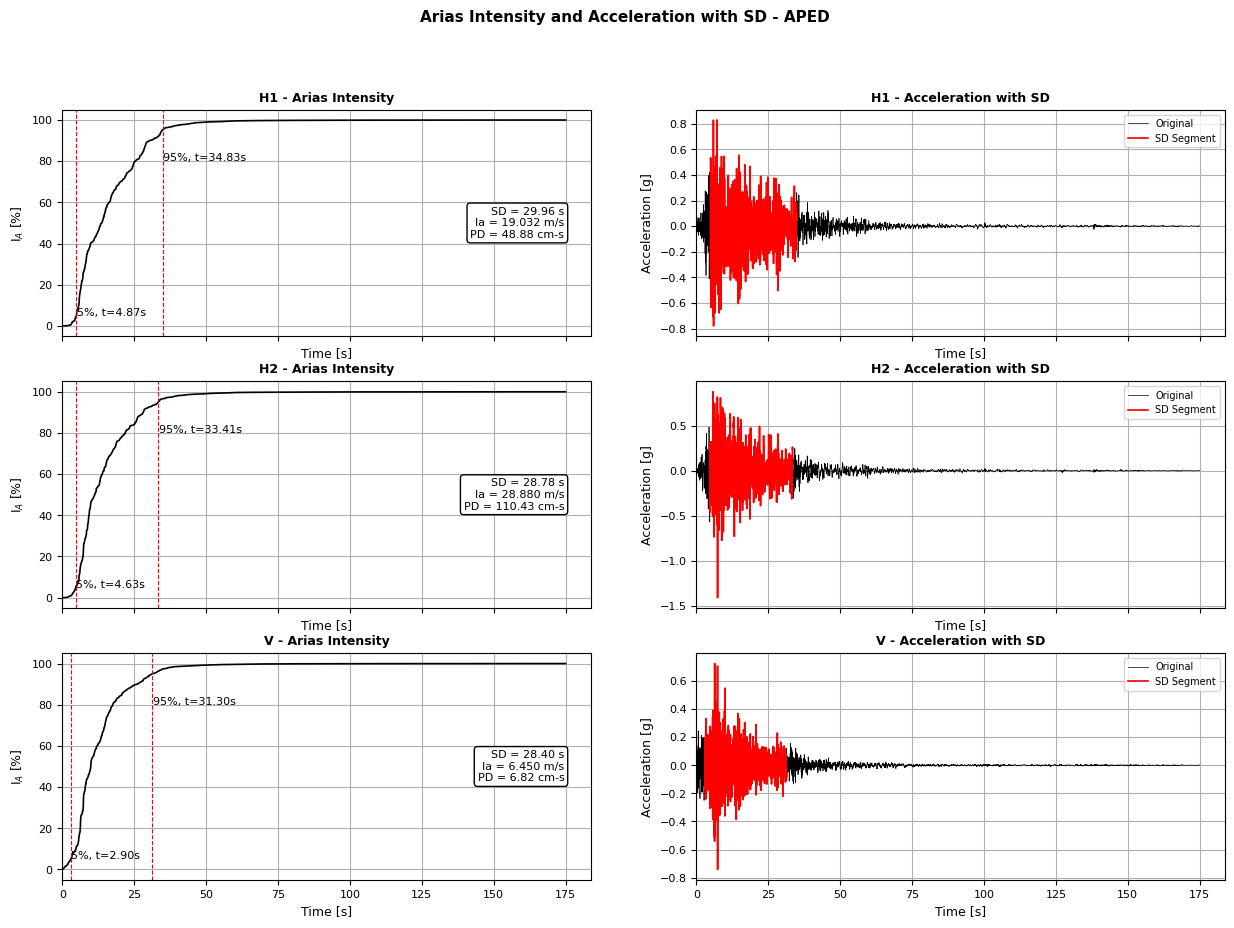

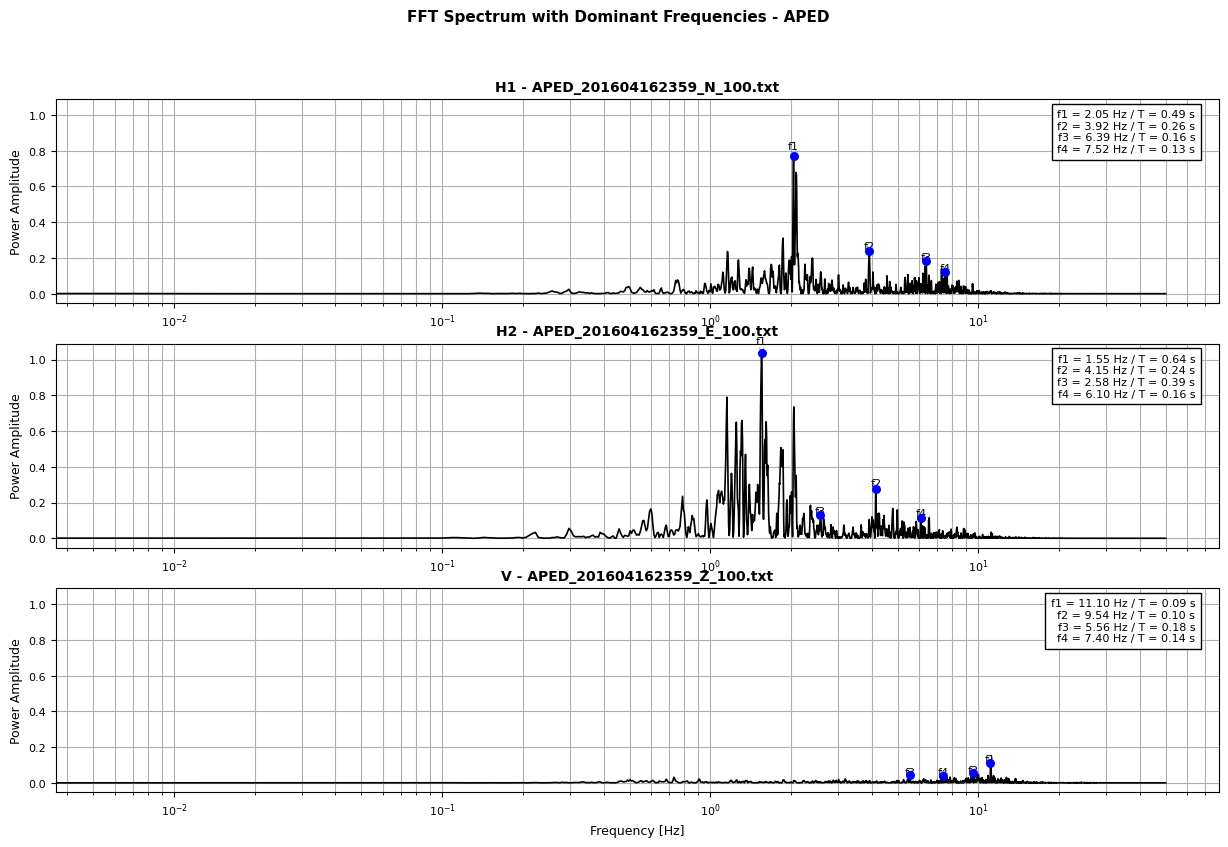

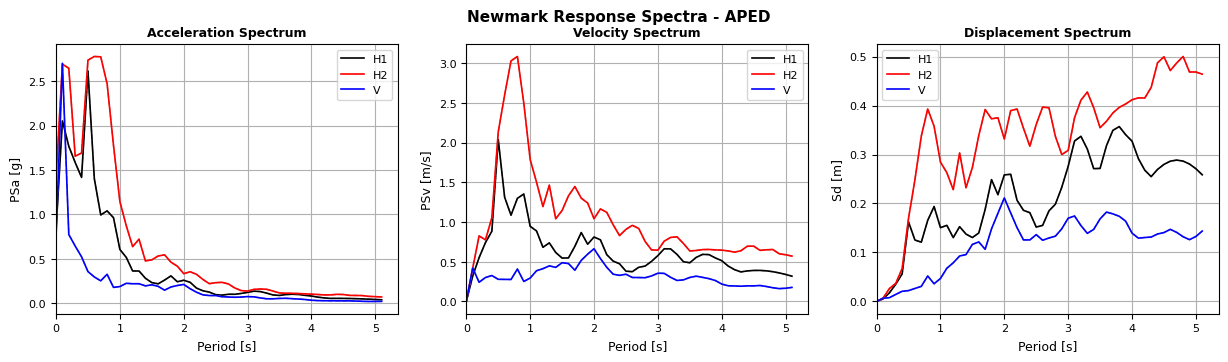

In [6]:
earthquake['APED'].print_summary()
earthquake['APED'].plot_original_signals()
earthquake['APED'].plot_corrected_signals()
earthquake['APED'].plot_arias_signals()
earthquake['APED'].plot_fourier_signals()
earthquake['APED'].plot_newmark_spectra()


In [7]:
earthquake['APED'].component_names['H1']

'APED_201604162359_N_100.txt'

In [8]:
record = earthquake['APED']


print("🔹 Arias Intensity")
print(f"Significant Duration Start  : {record.arias['H1']['t_start']:.3f} s")
print(f"Significant Duration End    : {record.arias['H1']['t_end']:.3f} s")
print(f"Total Arias Intensity       : {record.arias['H1']['IA_total']:.5f} m/s")
print(f"Destructive Potential Index : {record.arias['H1']['pot_dest']:.5f}")


print("\n🔹 Fourier Analysis")
print("Dominant Periods (s):", record.fourier['H1']['dominant_periods'])

🔹 Arias Intensity
Significant Duration Start  : 4.870 s
Significant Duration End    : 34.830 s
Total Arias Intensity       : 19.03169 m/s
Destructive Potential Index : 0.48883

🔹 Fourier Analysis
Dominant Periods (s): [0.48888268 0.2551312  0.15640751 0.13299392]


In [9]:
APED_Signals=record.signals['H1']

## Keys and Methods

In [10]:

first_key = next(iter(earthquake))
eq = earthquake[first_key]

print("Keys:")
for key in vars(eq):
    print(f"  - {key}")

print("\nMethods:")
import inspect
methods = [name for name, obj in inspect.getmembers(eq, inspect.ismethod) if not name.startswith('_')]
for m in methods:
    print(f"  - {m}()")

Keys:
  - filepath
  - config
  - name
  - dt
  - signals
  - component_names
  - corrected_acc
  - corrected_vel
  - corrected_disp
  - arias
  - newmark_spectra
  - rotd
  - fourier
  - summary_tool
  - plotter_tool
  - comparison_tool
  - arias_plotter
  - fourier_plotter
  - newmark_plotter
  - rotd_plotter
  - exporter
  - signals_raw

Methods:
  - export()
  - load_and_process()
  - plot_arias_signals()
  - plot_corrected_signals()
  - plot_fourier_signals()
  - plot_newmark_spectra()
  - plot_original_signals()
  - plot_rotd()
  - print_summary()


In [11]:
# import numpy as np
# import matplotlib.pyplot as plt
# import os

# # Datos
# acel = earthquake['1RUPBL1'].signals['H1']
# dt = earthquake['1RUPBL1'].dt
# name = earthquake['1RUPBL1'].name
# label = earthquake['1RUPBL1'].component_names['H1']

# # Eje de tiempo
# time = np.arange(len(acel)) * dt

# # Crear figura
# plt.figure(figsize=(7, 2))
# plt.plot(time, acel, label=f"H1 - {label}", linewidth=1.5)

# # Formato
# plt.xlabel('Time [s]', fontsize=9, fontweight='bold')
# plt.ylabel('Acceleration [g]', fontsize=9, fontweight='bold')
# plt.title(f"H1 Ground Motion - {name}", fontsize=11, fontweight='bold')
# plt.legend(loc='upper right', fontsize=9)
# plt.tick_params(axis='both', labelsize=9)
# plt.grid(True)
# plt.xlim(left=0)

# # Guardar como SVG (opcional)
# save_svg = True
# if save_svg:
#     project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
#     output_path = os.path.join(project_root, 'outputs', name)
#     os.makedirs(output_path, exist_ok=True)
#     file_path = os.path.join(output_path, "H1_ground_motion.svg")
#     plt.savefig(file_path, format="svg")

# # Mostrar
# plt.show()


In [12]:
# ppp

### All spectra

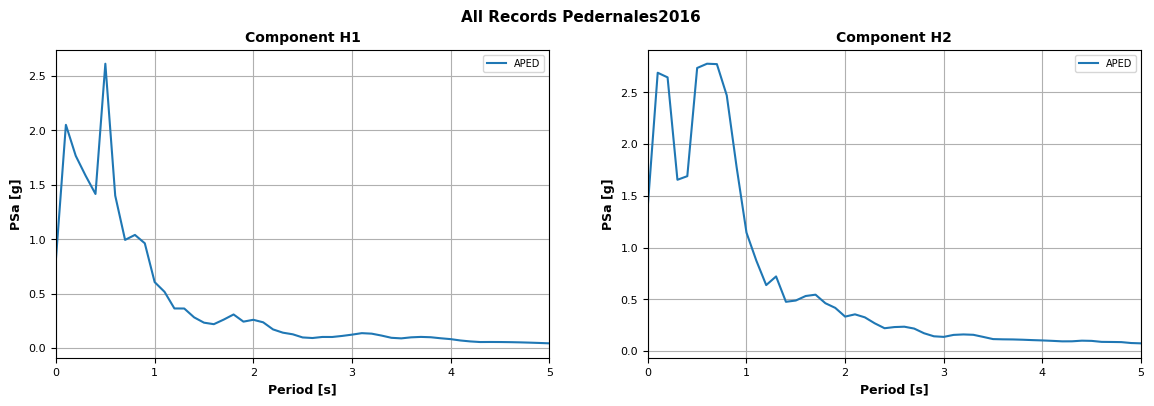

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import os

# --- Calcular ruta correcta ---
project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..', '..'))
output_dir = os.path.join(project_root, 'outputs')
os.makedirs(output_dir, exist_ok=True)
svg_path = os.path.join(output_dir, "all _records_pedernales2016.svg")

# --- Graficar espectros ---
plt.figure(figsize=(14, 4))

# Subplot para H1
plt.subplot(1, 2, 1)
for rsn, eq in earthquake.items():
    try:
        T_H1 = eq.newmark_spectra['H1']['T']
        PSa_H1 = eq.newmark_spectra['H1']['PSa']
        plt.plot(T_H1, PSa_H1, linewidth=1.5, label=f"{rsn}")
    except KeyError:
        print(f"Warning: {rsn} missing H1 spectrum")

plt.title("Component H1", fontsize=10, fontweight='bold')
plt.xlabel("Period [s]", fontsize=9, fontweight='bold')
plt.ylabel("PSa [g]", fontsize=9, fontweight='bold')
plt.grid(True, which='both')
plt.xlim(left=0, right=5)
plt.tick_params(axis='both', labelsize=8)
plt.legend(fontsize=7, loc='upper right', ncol=2)

# Subplot para H2
plt.subplot(1, 2, 2)
for rsn, eq in earthquake.items():
    try:
        T_H2 = eq.newmark_spectra['H2']['T']
        PSa_H2 = eq.newmark_spectra['H2']['PSa']
        plt.plot(T_H2, PSa_H2, linewidth=1.5, label=f"{rsn}")
    except KeyError:
        print(f"Warning: {rsn} missing H2 spectrum")

plt.title("Component H2", fontsize=10, fontweight='bold')
plt.xlabel("Period [s]", fontsize=9, fontweight='bold')
plt.ylabel("PSa [g]", fontsize=9, fontweight='bold')
plt.grid(True, which='both')
plt.xlim(left=0, right=5)
plt.tick_params(axis='both', labelsize=8)
plt.legend(fontsize=7, loc='upper right', ncol=2)

plt.suptitle("All Records Pedernales2016", fontsize=11, fontweight='bold')

# --- Guardar como SVG en outputs/
plt.savefig(svg_path, format='svg')
plt.show()




### Rotd100

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


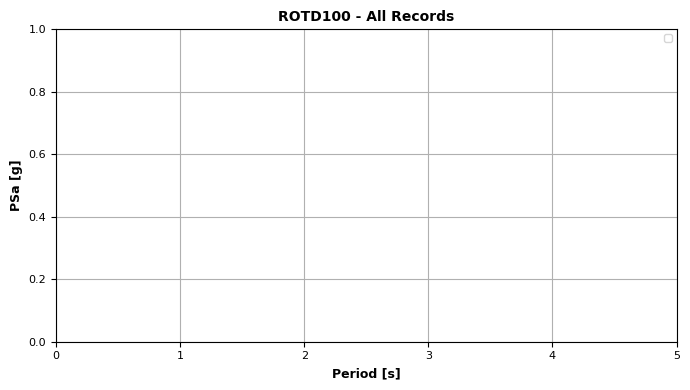

In [14]:


# Create figure with 1 row and 1 column
plt.figure(figsize=(7, 4))

# Subplot for ROTD100
plt.subplot(1, 1, 1)
for rsn, eq in earthquake.items():
    try:

        T = eq.rotd['T']
        PSa_rotd100 = eq.rotd['ROTD100']
        pga = round(PSa_rotd100[0], 3)
        plt.plot(T, PSa_rotd100, linewidth=1.5, label=f"{rsn} -PGA:{pga} g")
    except KeyError:
        print(f"Warning: {rsn} missing ROTD100 spectrum")

plt.title("ROTD100 - All Records", fontsize=10, fontweight='bold')
plt.xlabel("Period [s]", fontsize=9, fontweight='bold')
plt.ylabel("PSa [g]", fontsize=9, fontweight='bold')
plt.grid(True, which='both')
plt.xlim(left=0, right=5)
plt.tick_params(axis='both', labelsize=8)
plt.legend(fontsize=7, loc='upper right', ncol=2)
plt.tight_layout()
plt.show()
